In [1]:
import sys, os
sys.path.append("/Users/varga/PycharmProjects/surfe/_buildv15_3")

import surfepy as sp

 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [2]:
gp

<module 'gempy' from '../../gempy/__init__.py'>

In [3]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,1,50], 
                        path_o = path_to_data + "model3_orientations.csv",
                        path_i = path_to_data + "model3_surface_points.csv") 

Active grids: ['regular']


../../gempy/core/model.py:793: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  self.surfaces.df['series'].cat.reorder_categories(self.series.df.index.get_values(),
../../gempy/core/model.py:795: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  self.series.df.index = self.series.df.index.reorder_categories(self.series.df.index.get_values(),
../../gempy/core/model.py:506: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  aux = self.series.df.index.drop('Basement').get_values()
../../gempy/core/model.py:294: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  self.surfaces.df['series'].cat.reorder_categories(self.series.df.index.get_values(),


In [4]:
interfaces = geo_data.surface_points.df[['X', 'Y', 'Z', 'id']].values.astype(float)
#interfaces[:,3] = 0
interfaces

array([[0.0e+00, 2.0e+02, 8.0e+02, 1.0e+00],
       [0.0e+00, 2.0e+02, 2.0e+02, 1.0e+00],
       [1.0e+02, 2.0e+02, 7.9e+02, 1.0e+00],
       [1.0e+02, 2.0e+02, 2.1e+02, 1.0e+00],
       [2.0e+02, 2.0e+02, 7.8e+02, 1.0e+00],
       [2.0e+02, 2.0e+02, 2.2e+02, 1.0e+00],
       [3.0e+02, 2.0e+02, 7.7e+02, 1.0e+00],
       [3.0e+02, 2.0e+02, 2.3e+02, 1.0e+00],
       [4.0e+02, 2.0e+02, 7.6e+02, 1.0e+00],
       [4.0e+02, 2.0e+02, 2.4e+02, 1.0e+00],
       [7.0e+02, 2.0e+02, 5.0e+02, 1.0e+00],
       [0.0e+00, 0.0e+00, 8.0e+02, 1.0e+00],
       [0.0e+00, 0.0e+00, 2.0e+02, 1.0e+00],
       [1.0e+02, 0.0e+00, 7.9e+02, 1.0e+00],
       [1.0e+02, 0.0e+00, 2.1e+02, 1.0e+00],
       [2.0e+02, 0.0e+00, 7.8e+02, 1.0e+00],
       [2.0e+02, 0.0e+00, 2.2e+02, 1.0e+00],
       [3.0e+02, 0.0e+00, 7.7e+02, 1.0e+00],
       [3.0e+02, 0.0e+00, 2.3e+02, 1.0e+00],
       [4.0e+02, 0.0e+00, 7.6e+02, 1.0e+00],
       [4.0e+02, 0.0e+00, 2.4e+02, 1.0e+00],
       [7.0e+02, 0.0e+00, 5.0e+02, 1.0e+00],
       [0.

In [5]:
s = sp.Surfe_API(2)

In [6]:
s.SetRBFShapeParameter(1)

In [7]:
s.SetInterfaceConstraints(interfaces)

In [8]:
for i in interfaces:
    s.AddInterfaceConstraint(*i)

In [9]:
s.GetInterfaceConstraints()

array([[0.0e+00, 2.0e+02, 8.0e+02, 1.0e+00],
       [0.0e+00, 2.0e+02, 2.0e+02, 1.0e+00],
       [1.0e+02, 2.0e+02, 7.9e+02, 1.0e+00],
       [1.0e+02, 2.0e+02, 2.1e+02, 1.0e+00],
       [2.0e+02, 2.0e+02, 7.8e+02, 1.0e+00],
       [2.0e+02, 2.0e+02, 2.2e+02, 1.0e+00],
       [3.0e+02, 2.0e+02, 7.7e+02, 1.0e+00],
       [3.0e+02, 2.0e+02, 2.3e+02, 1.0e+00],
       [4.0e+02, 2.0e+02, 7.6e+02, 1.0e+00],
       [4.0e+02, 2.0e+02, 2.4e+02, 1.0e+00],
       [7.0e+02, 2.0e+02, 5.0e+02, 1.0e+00],
       [0.0e+00, 0.0e+00, 8.0e+02, 1.0e+00],
       [0.0e+00, 0.0e+00, 2.0e+02, 1.0e+00],
       [1.0e+02, 0.0e+00, 7.9e+02, 1.0e+00],
       [1.0e+02, 0.0e+00, 2.1e+02, 1.0e+00],
       [2.0e+02, 0.0e+00, 7.8e+02, 1.0e+00],
       [2.0e+02, 0.0e+00, 2.2e+02, 1.0e+00],
       [3.0e+02, 0.0e+00, 7.7e+02, 1.0e+00],
       [3.0e+02, 0.0e+00, 2.3e+02, 1.0e+00],
       [4.0e+02, 0.0e+00, 7.6e+02, 1.0e+00],
       [4.0e+02, 0.0e+00, 2.4e+02, 1.0e+00],
       [7.0e+02, 0.0e+00, 5.0e+02, 1.0e+00],
       [0.

In [10]:
orientations = geo_data.orientations.df[['X', 'Y', 'Z', 'G_x', 'G_y', 'G_z']].values
orientations

array([[ 2.00000000e+02,  5.00000000e+02,  7.80000000e+02,
        -9.98407460e-02,  9.99993887e-13, -9.95003430e-01],
       [ 2.00000000e+02,  5.00000000e+02,  2.20000000e+02,
        -9.98407460e-02,  9.99993887e-13,  9.95003430e-01]])

In [11]:
s.SetPlanarConstraints(orientations)
s.GetPlanarConstraints()

array([[ 2.00000000e+02,  5.00000000e+02,  7.80000000e+02,
        -9.98407460e-02,  9.99993887e-13, -9.95003430e-01],
       [ 2.00000000e+02,  5.00000000e+02,  2.20000000e+02,
        -9.98407460e-02,  9.99993887e-13,  9.95003430e-01]])

In [12]:
s.ComputeInterpolant()

In [13]:
sol_scalar = []
for i in geo_data.grid.values:
    sol_scalar.append(s.EvaluateInterpolantAtPoint(*i))

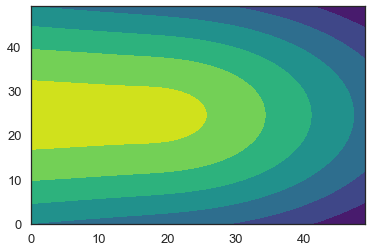

In [14]:
plt.contourf(np.array(sol_scalar).reshape(50,50).T, cmap='viridis')

In [15]:
gp.set_interpolation_data(geo_data)

Compiling theano function...
Compilation Done!


In [16]:
gp.compute_model(geo_data)

/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.21908e-08): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
../../gempy/core/solution.py:258: UserWarning: Surfaces not computed due to: Input array must be at least 2x2x2.
  warnings.warn('Surfaces not computed due to: ' + str(e))
../../gempy/core/solution.py:258: UserWarning: Surfaces not computed due to: Input array must be at least 2x2x2.
  warnings.warn('Surfaces not computed due to: ' + str(e))



Lithology ids 
  [0. 0. 0. ... 0. 0. 0.] 

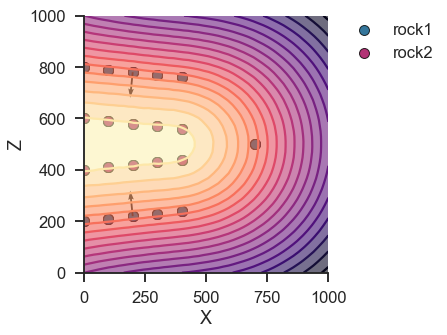

In [18]:
gp.plot.plot_scalar_field(geo_data, 0)